In [21]:
import numpy as np
import matplotlib.pyplot as plt
from twython import Twython as twt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [22]:
consumer_key = '3Dq5pY4ZjFeO5zcV3FjTjx9uK'
consumer_secret = 'KTqyYyKKQXPHYxFeSHZ4iN4Kgx6REgIt5kUdDMjL7OAYhixOhF'
access_token = '255021617-4HuoAgOGBqrn1cjuUMVxvtLe6ZV8gFRrQzu8evMc'
access_token_secret = 'jD4bHzOD03VEEzXigFolxdacW9KQjhbYB8PoElQNKJllP'

In [23]:
twitter = twt(consumer_key, 
              consumer_secret, 
              access_token,
              access_token_secret)

In [24]:
tweet = "Yardha gans se UGM"
twitter.update_status(status = tweet)

{'created_at': 'Sun May 12 01:54:38 +0000 2019',
 'id': 1127391601112731648,
 'id_str': '1127391601112731648',
 'text': 'Yardha gans se UGM',
 'truncated': False,
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'source': '<a href="https://drive.google.com/drive/u/0/my-drive" rel="nofollow">betelgeus</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 255021617,
  'id_str': '255021617',
  'name': 'Marisha Salsabila',
  'screen_name': 'Salsamarisha',
  'location': 'Sleman, Yogyakarta',
  'description': '',
  'url': None,
  'entities': {'description': {'urls': []}},
  'protected': False,
  'followers_count': 648,
  'friends_count': 759,
  'listed_count': 2,
  'created_at': 'Sun Feb 20 14:11:28 +0000 2011',
  'favourites_count': 101,
  'utc_offset': None,
  'time_zone': None,
  'geo_enabled': True,
  'verified': False,
  'st

In [36]:
user_timeline = twitter.get_user_timeline(screen_name = 'jokowi',
                                         count=1)
last_id = user_timeline[0]['id'] -1
for i in range(16):
    batch = twitter.get_user_timeline(screen_name= 'jokowi',
                                     count=200, max_id = last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [39]:
user_timeline

[{'created_at': 'Sat May 11 01:28:39 +0000 2019',
  'id': 1127022673261760513,
  'id_str': '1127022673261760513',
  'text': 'Sekarang saatnya fokus pada pembangunan SDM. Sebanyak 51 % tenaga kerja kita lulusan SD. Ini harus kita selesaikan… https://t.co/1i0MJVr9XH',
  'truncated': True,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/1i0MJVr9XH',
     'expanded_url': 'https://twitter.com/i/web/status/1127022673261760513',
     'display_url': 'twitter.com/i/web/status/1…',
     'indices': [116, 139]}]},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 366987179,
   'id_str': '366987179',
   'name': 'Joko Widodo',
   'screen_name': 'jokowi',
   'location': 'Jakarta',
   'description': 'Akun Twit

In [40]:
raw_tweets = []
for tweets in user_timeline:
    raw_tweets.append(tweets['text'])

In [41]:
raw_tweets

['Sekarang saatnya fokus pada pembangunan SDM. Sebanyak 51 % tenaga kerja kita lulusan SD. Ini harus kita selesaikan… https://t.co/1i0MJVr9XH',
 'Selamat bekerja Pak Abdul Gani Kasuba dan M. Al Yasin Ali sebagai Gubernur dan Wakil Gubernur Maluku Utara periode… https://t.co/mEWCmNBfJG',
 'Reformasi struktural ini penting. Lima tahun lalu, investasi pembangkit listrik butuh 259 izin. Sudah berkurang jad… https://t.co/RNuOC6twLm',
 'Infrastruktur yang dibangun pemerintah pusat di sejumlah daerah harus segera disambungkan oleh provinsi, kabupaten,… https://t.co/gqi7NpCr0M',
 'Tahun 2045, satu abad setelah kemerdekaan, Indonesia diperkirakan masuk dalam empat atau lima besar ekonomi terkuat… https://t.co/R7uNknfWQR',
 'Tiang batu pertama pembangunan Kota Palangka Raya, Kalimantan Tengah, yang dipancangkan oleh Presiden Soekarno, 62… https://t.co/X82zwK8p9n',
 'Meninjau kesiapan salah satu calon ibu kota negara di tengah Pulau Kalimantan. https://t.co/JFbyx80j40',
 'Mendarat di "kawasan seg

In [42]:
raw_string = ''.join(raw_tweets)

no_links = re.sub(r'http\S+', '', raw_string)
no_username = re.sub(r'@\S+', '', no_links)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_username)
no_special_character = re.sub('[^A-Za-z ]+', '', no_unicode)

In [53]:
words = no_special_character.split(" ")
words = [w for w in words if len(w) > 2]
words = [w.lower() for w in words]

In [54]:
raw_tweets

['Sekarang saatnya fokus pada pembangunan SDM. Sebanyak 51 % tenaga kerja kita lulusan SD. Ini harus kita selesaikan… https://t.co/1i0MJVr9XH',
 'Selamat bekerja Pak Abdul Gani Kasuba dan M. Al Yasin Ali sebagai Gubernur dan Wakil Gubernur Maluku Utara periode… https://t.co/mEWCmNBfJG',
 'Reformasi struktural ini penting. Lima tahun lalu, investasi pembangkit listrik butuh 259 izin. Sudah berkurang jad… https://t.co/RNuOC6twLm',
 'Infrastruktur yang dibangun pemerintah pusat di sejumlah daerah harus segera disambungkan oleh provinsi, kabupaten,… https://t.co/gqi7NpCr0M',
 'Tahun 2045, satu abad setelah kemerdekaan, Indonesia diperkirakan masuk dalam empat atau lima besar ekonomi terkuat… https://t.co/R7uNknfWQR',
 'Tiang batu pertama pembangunan Kota Palangka Raya, Kalimantan Tengah, yang dipancangkan oleh Presiden Soekarno, 62… https://t.co/X82zwK8p9n',
 'Meninjau kesiapan salah satu calon ibu kota negara di tengah Pulau Kalimantan. https://t.co/JFbyx80j40',
 'Mendarat di "kawasan seg

In [60]:
words

['sekarang',
 'saatnya',
 'fokus',
 'pada',
 'pembangunan',
 'sdm',
 'sebanyak',
 'tenaga',
 'kerja',
 'kita',
 'lulusan',
 'ini',
 'harus',
 'kita',
 'selesaikan',
 'bekerja',
 'pak',
 'abdul',
 'gani',
 'kasuba',
 'dan',
 'yasin',
 'ali',
 'sebagai',
 'gubernur',
 'dan',
 'wakil',
 'gubernur',
 'maluku',
 'utara',
 'periode',
 'struktural',
 'ini',
 'penting',
 'lima',
 'tahun',
 'lalu',
 'investasi',
 'pembangkit',
 'listrik',
 'butuh',
 'izin',
 'sudah',
 'berkurang',
 'jad',
 'yang',
 'dibangun',
 'pemerintah',
 'pusat',
 'sejumlah',
 'daerah',
 'harus',
 'segera',
 'disambungkan',
 'oleh',
 'provinsi',
 'kabupaten',
 'satu',
 'abad',
 'setelah',
 'kemerdekaan',
 'indonesia',
 'diperkirakan',
 'masuk',
 'dalam',
 'empat',
 'atau',
 'lima',
 'besar',
 'ekonomi',
 'terkuat',
 'batu',
 'pertama',
 'pembangunan',
 'kota',
 'palangka',
 'raya',
 'kalimantan',
 'tengah',
 'yang',
 'dipancangkan',
 'oleh',
 'presiden',
 'soekarno',
 'kesiapan',
 'salah',
 'satu',
 'calon',
 'ibu',
 'kota

In [61]:
words = ' '.join(words)

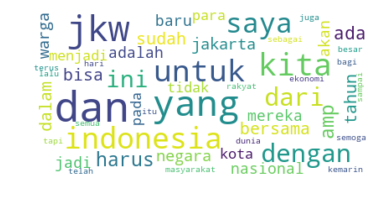

In [62]:
wordcloud = WordCloud(max_font_size=50, max_words=50, 
                      background_color='white',).generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [66]:
stop = ['dan','yang','untuk','kita','ada','itu','pada']

In [67]:
len(words)

169097

In [68]:
term_stop = [t for t in words if t not in stop]

In [69]:
len(words)

169097

In [ ]:
for word in words:
    if word not in stop: 
        print(words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(words)